In [5]:
%matplotlib inline
from galaxy_analysis.plot.plot_styles import *
import numpy as np
import yt
import matplotlib.pyplot as plt
from galaxy_analysis.analysis import Galaxy
from galaxy_analysis.utilities import utilities
import deepdish as dd
import glob

In [6]:
wdir = '/home/aemerick/work/enzo_runs/'

comparison = {'Fiducial' : (wdir + 'sn_H2atten_H2sh/', 'Fiducial', '-'),
              'Shotrad'  : (wdir + 'sn_H2atten_H2_shortrad/', 'Shortard', '--'),
              'NORT'     : (wdir + 'sn_H2atten_H2_noion/', 'No RT', '-.')}


In [7]:
from galaxy_analysis.method_paper_plots import mass_plot
mass_plot.plot_mass_resolution(work_dir = '',
                               output_dir = './rad_comparison/',
                               comparison= comparison)

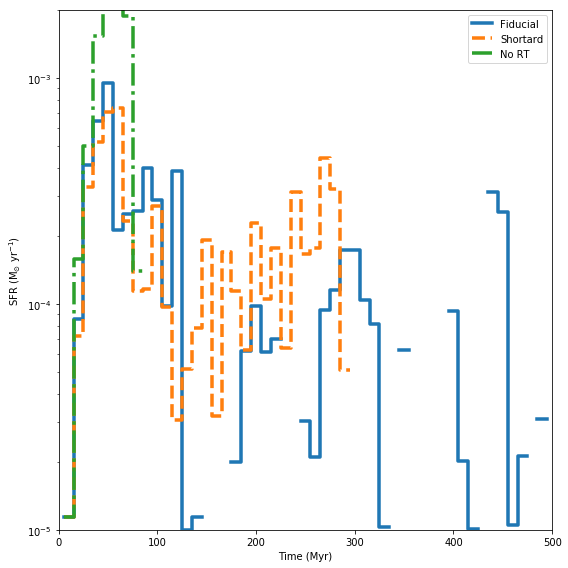

In [8]:
from galaxy_analysis.method_paper_plots import sfr_resolution

sfr_resolution.sfr_resolution(work_dir = '', output_dir = './rad_comparison/',
                              comparison = comparison)

In [44]:
def plot_phase_comparison(comparison):
    dirs = {}
    labels = {}
    lstyle = {}
    for k in comparison.keys():
        dirs[k]   = comparison[k][0]
        labels[k] = comparison[k][1]
        lstyle[k] = comparison[k][2]
        
        
    all_data = {}
    for k in labels.keys():
        all_data[k] = {}
    
        
        dl, t = utilities.select_data_by_time(dir = dirs[k], tmin = 0.0, tmax = 700.0)
        all_data[k]['time'] = t - t[0]
        for weight in ['mass','volume']:
            all_data[k][weight] = {}
            
            for phase in ['CNM','WNM','WIM','HIM']:
            
                field = '/gas_meta_data/' + weight + '_fractions' + '/' + phase 
                all_data[k][weight][phase] = utilities.get_property(field, file_list = dl)
                
                # gonna log this later --- fix the zeros
                all_data[k][weight][phase][ all_data[k][weight][phase] == 0.0] = 1.0E-99
                all_data[k][weight][phase] = np.log10(all_data[k][weight][phase])
                
    fig, ax = plt.subplots(2,4)
    fig.set_size_inches(16,8)    
    for k in all_data.keys():
        
        temp = all_data[k]
        
        f = 'CNM'
        ax[(0,0)].plot(temp['time'], temp['mass'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        ax[(1,0)].plot(temp['time'], temp['volume'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        
        f = 'WNM'
        ax[(0,1)].plot(temp['time'], temp['mass'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        ax[(1,1)].plot(temp['time'], temp['volume'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        
        f = 'WIM'
        ax[(0,2)].plot(temp['time'], temp['mass'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        ax[(1,2)].plot(temp['time'], temp['volume'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        
        f = 'HIM'        
        ax[(0,3)].plot(temp['time'], temp['mass'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        ax[(1,3)].plot(temp['time'], temp['volume'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])

    for a1 in ax:
        for a2 in a1:
            a2.set_xlabel(r'Time (Myr)')
            a2.set_ylabel(r'Fraction')
            a2.set_xlim(0.0,500.0)
            a2.set_ylim(-4,0)
            #a2.semilogy()
    plt.tight_layout()
    
    fig.savefig('./rad_comparison/phase_comparison.png')
    

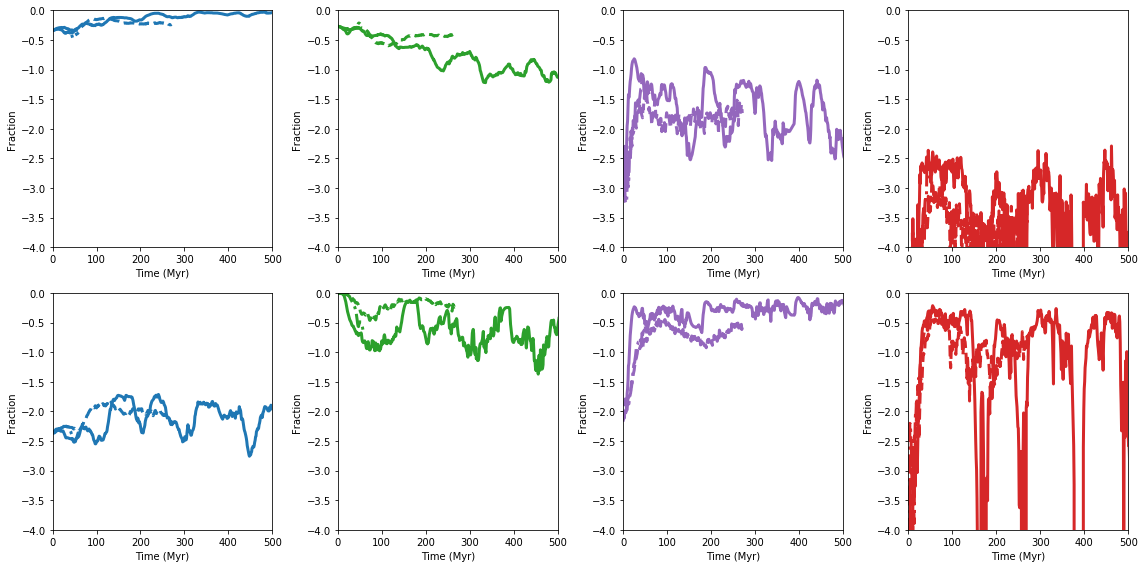

In [45]:
plot_phase_comparison(comparison)